# Analysis Notebook

## 5 - Differentiate a Function

- In this section we will differentiate a given function using three methods: Dual, analytical, numerical
- We will analyse and compare the methods using plots 

In [75]:
from DualNum import Dual
from DualNum_c import Dual_c
from Dual import compute_derivative
import matplotlib.pyplot as plt
import math
import numpy as np
import time
import timeit

### Functions that return the derivate value at any given x value:


In [45]:
def f(x):
    return (x.sin()).log() + ((x * x) * x.cos())

In [56]:
deriv_value = compute_derivative(f, 1.5, Dual)
deriv_value_c = compute_derivative(f, 1.5, Dual_c)

def diff_analytic(x):
    return (math.cos(x) / math.sin(x)) + (2*x*math.cos(x)) - (x*x*math.sin(x))

def diff_numerical(x, h):
    return ((math.log(math.sin(x + h)) + (x+h)*(x+h)*math.cos(x+h)) - (math.log(math.sin(x)) + x*x*math.cos(x))) / h

In [47]:
print(f'The automatic derivative using Duals of log(sin(x)) + x*x*cos(x) = {deriv_value}')
print(f'The analytic derivative of log(sin(x)) + x*x*cos(x) = {diff_analytic(1.5)}')
print(f'The numerical derivative of log(sin(x)) + x*x*cos(x) = {diff_numerical(1.5, 1e-10)}')

The automatic derivative using Duals of log(sin(x)) + x*x*cos(x) = -1.9612372705533612
The analytic derivative of log(sin(x)) + x*x*cos(x) = -1.9612372705533612
The numerical derivative of log(sin(x)) + x*x*cos(x) = -1.9612381163547354


### Plotting the converegnce of the numerical method to the analytic solution

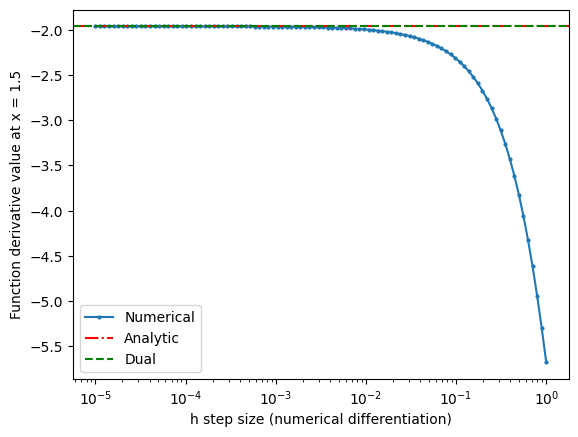

In [48]:

h_values = [10**i for i in np.linspace(-5, 0, 100)]

plt.figure(dpi = 100)
plt.plot(h_values, [diff_numerical(1.5,h) for h in h_values], label = 'Numerical', marker = 'o', markersize = 2)    
plt.axhline(y = diff_analytic(1.5), color = 'r', label = f'Analytic', linestyle = '-.')
plt.axhline(y = deriv_value, color = 'g', label = 'Dual', linestyle = '--')
plt.xscale('log')
plt.xlabel('h step size (numerical differentiation)')
plt.ylabel('Function derivative value at x = 1.5')
plt.savefig('plots/diff_test.png', dpi = 300, bbox_inches = 'tight')
plt.legend()


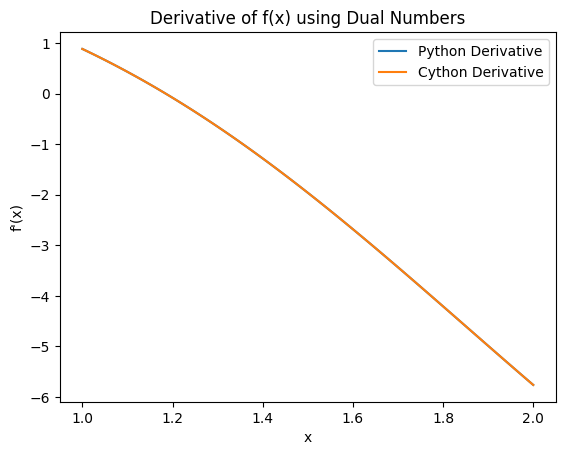

In [49]:

x_vals = np.linspace(1.0, 2.0, 100)
derivatives_python = [compute_derivative(f, x, Dual) for x in x_vals]
derivatives_cython = [compute_derivative(f, x, Dual_c) for x in x_vals]

plt.plot(x_vals, derivatives_python, label="Python Derivative")
plt.plot(x_vals, derivatives_cython, label="Cython Derivative")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.title("Derivative of f(x) using Dual Numbers")
plt.savefig("plots/Derivative of f(x) using Dual Numbers.png", dpi = 300, bbox_inches = 'tight')
plt.show()

## 9 - Comparison between the pure python and cythonized packages

In [50]:
x = Dual(1.5, 1)
y = Dual_c(1.5, 1)

In [51]:
def benchmark_normal():
    for _ in range(1000):
        compute_derivative(f, 1.5, Dual)


def benchmark_cython():
    for _ in range(1000):
        compute_derivative(f, 1.5, Dual_c)


# Measure the performance
normal_time = timeit.timeit(benchmark_normal, number=100)
cython_time = timeit.timeit(benchmark_cython, number=100)

print(f"Normal version time: {normal_time:.4f} seconds")
print(f"Cythonized version time: {cython_time:.4f} seconds")
print(f"Speedup: {normal_time / cython_time:.2f}x")

Normal version time: 0.3709 seconds
Cythonized version time: 0.2795 seconds
Speedup: 1.33x


In [52]:
normal = []
cyth = []

for i in range (10,100):
    normal.append(timeit.timeit(benchmark_normal, number=i))
    cyth.append(timeit.timeit(benchmark_cython, number=i))



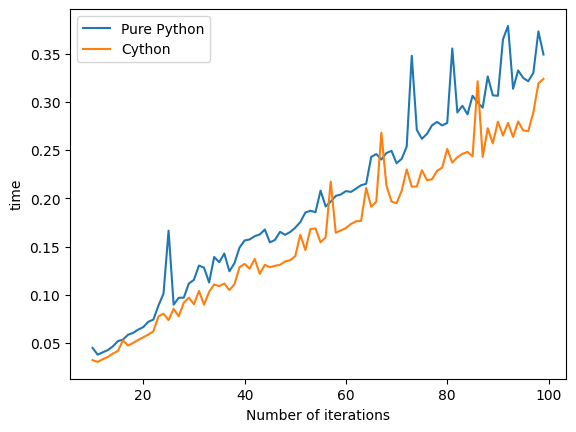

In [54]:
plt.plot(range(10,100), normal, label = 'Pure Python')
plt.plot(range(10,100), cyth, label = 'Cython')
plt.xlabel('Number of iterations')
plt.ylabel('time')
plt.savefig('plots/time_benchmark.png', dpi = 300, bbox_inches = 'tight')
plt.legend()

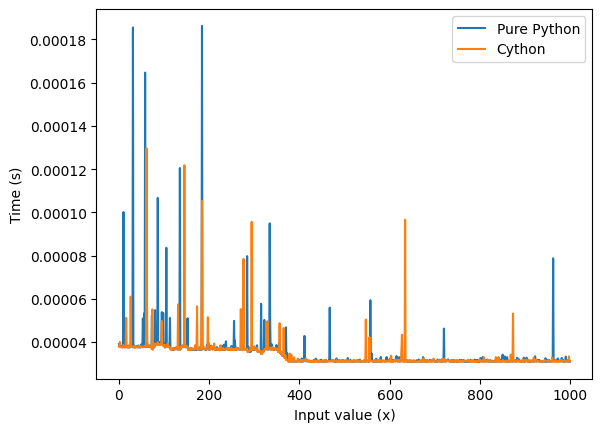

In [58]:
normal = []
cyth = []

# inputs = np.linspace(1, 3, 10000)
# for i in inputs:
for _ in range(0,1000):
    elapsed_normal = timeit.timeit(lambda: deriv_value, number=1000)
    elapsed_cython = timeit.timeit(lambda: deriv_value_c, number=1000)
    normal.append(elapsed_normal)
    cyth.append(elapsed_cython)

plt.plot(range(0,1000), normal, label = 'Pure Python')
plt.plot(range(0,1000), cyth, label = 'Cython')
plt.xlabel('Input value (x)')
plt.ylabel('Time (s)')
plt.savefig('plots/time_against_value.png', dpi = 300, bbox_inches = 'tight')
plt.legend()
    

## Extra Analysis - Deeper comparison  between between numerical and dual/dual(cythonized) autodifferentiation

In [2]:
def f_complex(x):
    return (x.sin() * (x+1).log()) + (x*x).cos() + (x*x).sin()

In [20]:
def numerical_derivative(f, x, h=1e-6):
    return (f(x+h) - f(x-h)) / (2*h)

In [76]:
x_values = np.linspace(1,10,100000)

results = {}

start_time = time.time()
deriv_value_complex = [compute_derivative(f_complex, x, Dual) for x in x_values]
end_time = time.time()
results['Dual (python)'] = end_time - start_time

start_time = time.time()
deriv_value_c_complex = [compute_derivative(f_complex, x, Dual_c) for x in x_values]
end_time = time.time()
results['Dual (cython)'] = end_time - start_time

start_time = time.time()
numerical_derivatives = [numerical_derivative(lambda z: np.sin(z) * np.log(z + 1) + np.cos(z**2) + np.sin(z**2), x) for x in x_values]
end_time = time.time()
results['Numerical'] = end_time - start_time


print("Time taken for each method:")
for method, timing in results.items():
    print(f"{method}: {timing:.4f} seconds")

Time taken for each method:
Dual (python): 0.7493 seconds
Dual (cython): 0.5775 seconds
Numerical: 0.7399 seconds


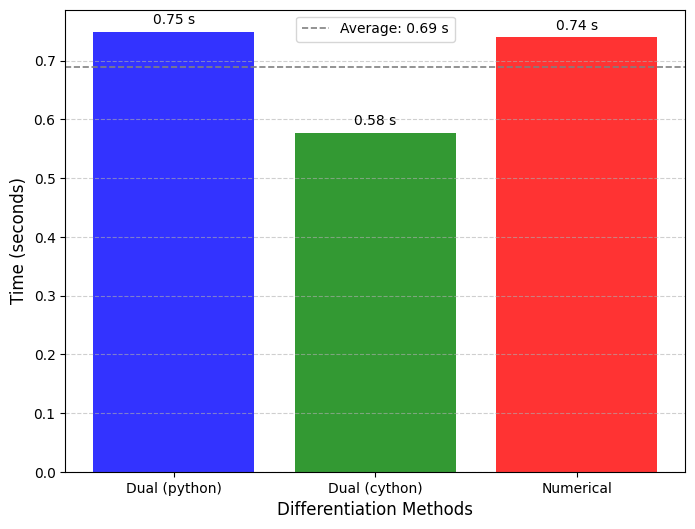

In [77]:

# Extract labels and values
methods = list(results.keys())
times = list(results.values())

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(methods, times, color=['blue', 'green', 'red'], alpha=0.8)

# Add annotations (time values) above the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.008,
             f"{bar.get_height():.2f} s", ha='center', va='bottom', fontsize=10)

# Add a horizontal line for average time (optional)
avg_time = np.mean(times)
plt.axhline(y=avg_time, color='gray', linestyle='--', linewidth=1.2, label=f"Average: {avg_time:.2f} s")

# Customize the plot
plt.ylabel("Time (seconds)", fontsize=12)
plt.xlabel("Differentiation Methods", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save the figure as high resolution
plt.savefig("plots/performance_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

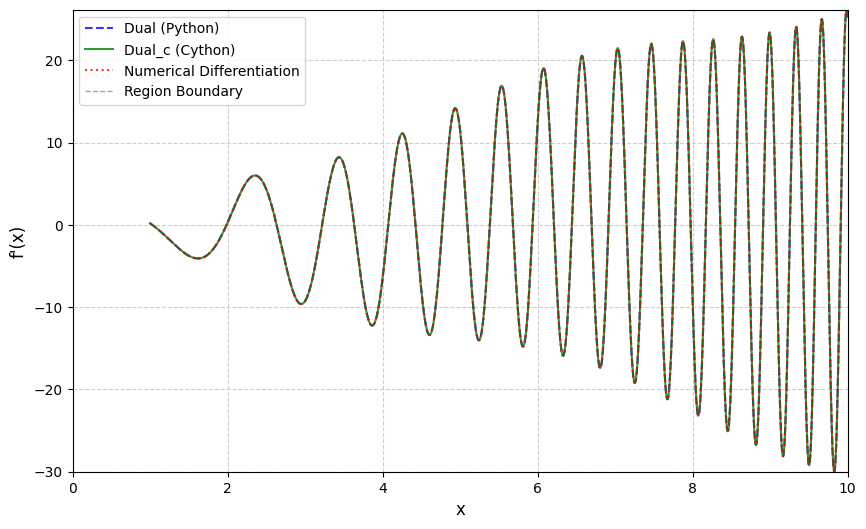

In [72]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each method
plt.plot(x_values, deriv_value_complex, label="Dual (Python)", linestyle="--", color="blue", alpha=0.8, linewidth=1.5)
plt.plot(x_values, deriv_value_c_complex, label="Dual_c (Cython)", linestyle="-", color="green", alpha=0.8, linewidth=1.5)
plt.plot(x_values, numerical_derivatives, label="Numerical Differentiation", linestyle=":", color="red", alpha=0.8, linewidth=1.5)

# Highlight specific sections
plt.axvline(x=200, color='gray', linestyle='--', linewidth=1, alpha=0.7, label="Region Boundary")
plt.axvline(x=800, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Customize axes and title
plt.xlabel("x", fontsize=12)
plt.ylabel("f'(x)", fontsize=12)
plt.xlim([0, 10])  # Adjust the range to focus on key areas
plt.ylim([min(min(deriv_value_complex), min(deriv_value_c_complex), min(numerical_derivatives)),
          max(max(deriv_value_complex), max(deriv_value_c_complex), max(numerical_derivatives))])

# Add gridlines and legend
plt.grid(axis='both', linestyle='--', alpha=0.6)
plt.legend(fontsize=10, loc='upper left')

# Save the plot
plt.savefig("plots/derivative_comparison.png", dpi=300, bbox_inches="tight")
plt.show()


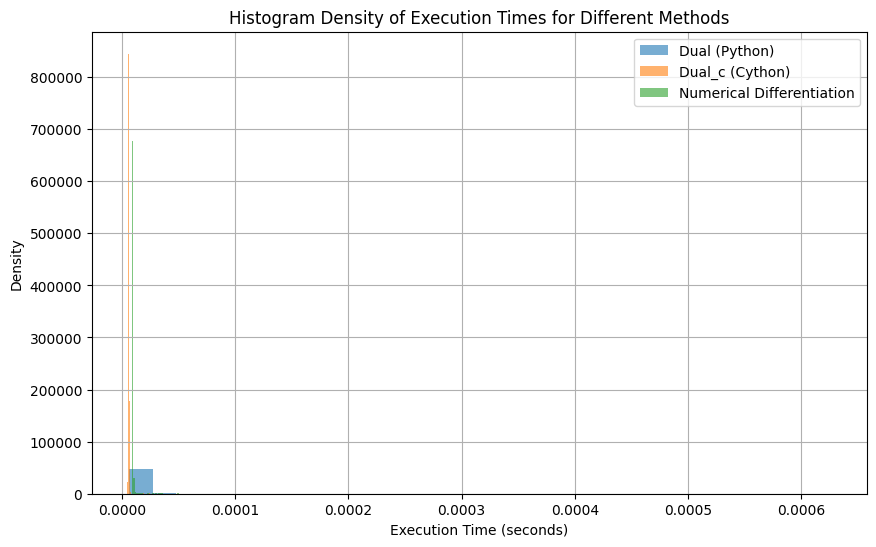

In [78]:
# Number of iterations
n_iterations = 1000
x_value = 1.5

# Initialize lists to store execution times
times_dual = []
times_dual_c = []
times_numerical = []

# Measure execution time for Dual (Python)
for _ in range(n_iterations):
    start_time = time.time()
    derivative = f_complex(Dual(x_value, 1)).dual
    end_time = time.time()
    times_dual.append(end_time - start_time)

# Measure execution time for Dual_c (Cython)
for _ in range(n_iterations):
    start_time = time.time()
    derivative = f_complex(Dual_c(x_value, 1)).dual
    end_time = time.time()
    times_dual_c.append(end_time - start_time)

# Measure execution time for Numerical Differentiation
for _ in range(n_iterations):
    start_time = time.time()
    derivative = numerical_derivative(lambda z: np.sin(z) * np.log(z + 1) + np.cos(z * z) + np.sin(z * z), x_value)
    end_time = time.time()
    times_numerical.append(end_time - start_time)

# Plotting the histogram density
plt.figure(figsize=(10, 6))
plt.hist(times_dual, bins=30, alpha=0.6, label="Dual (Python)", density=True)
plt.hist(times_dual_c, bins=30, alpha=0.6, label="Dual_c (Cython)", density=True)
plt.hist(times_numerical, bins=30, alpha=0.6, label="Numerical Differentiation", density=True)

plt.xlabel("Execution Time (seconds)")
plt.ylabel("Density")
plt.title("Histogram Density of Execution Times for Different Methods")
plt.legend()
plt.grid()
plt.show()